# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



## Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



## Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

#### Answer: 17 campaigns

## Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1591]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

In [1593]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

In [1595]:
pd.options.display.max_columns = None

In [1597]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [1599]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [1601]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [1606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### using the pandas value_counts() function, I found the following cloumns have unknow or nonexistent values:
##### job
##### marital
##### poutcome
##### education
##### default
##### housing
##### loan

In [1611]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [1614]:
df['marital'].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [1616]:
df['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [1618]:
df['education'].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [1620]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [1622]:
df['housing'].value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [1624]:
df['loan'].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [1626]:
df['contact'].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [1628]:
df['month'].value_counts()

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [1630]:
df['day_of_week'].value_counts()

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64

In [1632]:
df['duration'].value_counts()

duration
90      170
85      170
136     168
73      167
124     164
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: count, Length: 1544, dtype: int64

In [1634]:
df['duration'].max()

4918

In [1636]:
df['duration'].min()

0

In [1638]:
df['campaign'].value_counts()

campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64

In [1640]:
df['pdays'].value_counts()

pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [1642]:
df['previous'].value_counts()

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

In [1644]:
df['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [1646]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [1648]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [1650]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [1652]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [1654]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [1656]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [1658]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

## Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The business objective is to come up with a machine learning model that has a good performance in predicting the campaign results. The exact criteria of model performance will come from a balance of accuracy, recall, specificity...etc by examining the confusion matrix of the model.

In [1665]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

### save the original Dataframe

In [1671]:
df0 = df.copy()

#### Remove non-bank features ####
I will remove columns the following columns: emp.var.rate	cons.price.idx	cons.conf.idx	euribor3m	nr.employed	

Then Scale the numerical features

In [1676]:
df0 = df0.drop(columns = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx',	'euribor3m', 'nr.employed'])
df0[['age', 'duration', 'campaign', 'pdays', 'previous']] = StandardScaler().fit_transform(df0[['age', 'duration', 'campaign', 'pdays', 'previous']])
df0

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,1.533034,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0.010471,-0.565922,0.195414,-0.349494,nonexistent,no
1,1.628993,services,married,high.school,unknown,no,no,telephone,may,mon,-0.421501,-0.565922,0.195414,-0.349494,nonexistent,no
2,-0.290186,services,married,high.school,no,yes,no,telephone,may,mon,-0.124520,-0.565922,0.195414,-0.349494,nonexistent,no
3,-0.002309,admin.,married,basic.6y,no,no,no,telephone,may,mon,-0.413787,-0.565922,0.195414,-0.349494,nonexistent,no
4,1.533034,services,married,high.school,no,no,yes,telephone,may,mon,0.187888,-0.565922,0.195414,-0.349494,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,retired,married,professional.course,no,yes,no,cellular,nov,fri,0.292025,-0.565922,0.195414,-0.349494,nonexistent,yes
41184,0.573445,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,0.481012,-0.565922,0.195414,-0.349494,nonexistent,no
41185,1.533034,retired,married,university.degree,no,yes,no,cellular,nov,fri,-0.267225,-0.204909,0.195414,-0.349494,nonexistent,no
41186,0.381527,technician,married,professional.course,no,no,no,cellular,nov,fri,0.708569,-0.565922,0.195414,-0.349494,nonexistent,yes


In [1679]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          41188 non-null  float64
 1   job          41188 non-null  object 
 2   marital      41188 non-null  object 
 3   education    41188 non-null  object 
 4   default      41188 non-null  object 
 5   housing      41188 non-null  object 
 6   loan         41188 non-null  object 
 7   contact      41188 non-null  object 
 8   month        41188 non-null  object 
 9   day_of_week  41188 non-null  object 
 10  duration     41188 non-null  float64
 11  campaign     41188 non-null  float64
 12  pdays        41188 non-null  float64
 13  previous     41188 non-null  float64
 14  poutcome     41188 non-null  object 
 15  y            41188 non-null  object 
dtypes: float64(5), object(11)
memory usage: 5.0+ MB


#### define a function to remove entries with unknown values

In [1683]:
def removeUnknown(df):
    return df[(df.job != 'unknown') & (df.marital != 'unknown') & (df.poutcome != 'nonexistent') & (df.education != 'unknown') & (df.default != 'unknown') & (df.housing != 'unknown') & (df.loan != 'unknown')]

In [1685]:
df1 = removeUnknown(df0)

In [1687]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
24019,-0.002309,services,married,high.school,no,yes,no,telephone,oct,tue,-0.440785,-0.565922,0.195414,1.671136,failure,yes
24076,-0.386145,admin.,married,university.degree,no,yes,no,telephone,nov,wed,0.735567,-0.565922,0.195414,1.671136,failure,no
24102,-0.386145,admin.,married,high.school,no,yes,no,telephone,nov,wed,-0.556492,-0.565922,0.195414,1.671136,failure,yes
24108,-0.290186,admin.,married,university.degree,no,yes,no,telephone,nov,wed,-0.537207,-0.565922,-5.117342,1.671136,success,no
24113,-1.057857,self-employed,married,university.degree,no,yes,no,telephone,nov,thu,-0.664485,-0.565922,0.195414,1.671136,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41173,2.108788,retired,married,university.degree,no,yes,no,cellular,nov,thu,0.272740,-0.565922,0.195414,3.691766,failure,yes
41174,2.108788,retired,married,university.degree,no,yes,no,cellular,nov,thu,-0.193944,-0.565922,-5.144093,11.774288,success,yes
41178,2.108788,retired,married,university.degree,no,no,no,cellular,nov,thu,0.866702,-0.204909,-5.117342,5.712397,success,yes
41182,-1.057857,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,-0.564206,-0.565922,-5.101292,1.671136,success,no


#### Ragarding duration == 0
<p>I did not find any entries with duration == 0 after removing samples with Nan/Unknown entries, therefore I will keep the duration feature</p>

In [1691]:
df1.query('duration == 0')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y


In [1693]:
df1['duration'].min()

-0.9923205760168556

In [1695]:
df1.query('duration == 1')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y


In [1697]:
df1['pdays'].value_counts()

pdays
 0.195414    3342
-5.133393     381
-5.117342     363
-5.128043     102
-5.138743      53
-5.101292      53
-5.111992      50
-5.085241      50
-5.122692      43
-5.095941      40
-5.079891      33
-5.090591      25
-5.069190      22
-5.144093      21
-5.074540      17
-5.149443      14
-5.106642      13
-5.063840       8
-5.058490       6
-5.053140       5
-5.031739       3
-5.047789       3
-5.037089       2
-5.015688       1
-5.010338       1
-5.004988       1
Name: count, dtype: int64

#### Feature Encoding

#### define a function to do feature encoding

In [1702]:
def featureEncoding(df):
    # Define column selectors
    categorical_selector = make_column_selector(dtype_include=object)
    numerical_selector = make_column_selector(dtype_include=['int64', 'float64'])
    
    # Identify categorical and numerical columns
    categorical_columns = categorical_selector(df)
    numerical_columns = numerical_selector(df)
    
    preprocessor = ColumnTransformer(verbose_feature_names_out=False,
        transformers=[
            ('onehot', OneHotEncoder(drop='if_binary', sparse_output=False), categorical_columns),
            ('passthrough', 'passthrough', numerical_columns)  # Pass numerical columns
        ])
    
    encoded_data = preprocessor.fit_transform(df)
    return pd.DataFrame(encoded_data, columns = preprocessor.get_feature_names_out())
    

In [1705]:
df1 = featureEncoding(df1)

In [1707]:
df1

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_yes,housing_yes,loan_yes,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_success,y_yes,age,duration,campaign,pdays,previous
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.002309,-0.440785,-0.565922,0.195414,1.671136
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.386145,0.735567,-0.565922,0.195414,1.671136
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.386145,-0.556492,-0.565922,0.195414,1.671136
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.290186,-0.537207,-0.565922,-5.117342,1.671136
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.057857,-0.664485,-0.565922,0.195414,1.671136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4647,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.108788,0.272740,-0.565922,0.195414,3.691766
4648,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.108788,-0.193944,-0.565922,-5.144093,11.774288
4649,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.108788,0.866702,-0.204909,-5.117342,5.712397
4650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.057857,-0.564206,-0.565922,-5.101292,1.671136


In [1710]:
y1 = df1['y_yes']
df1 = df1.drop(columns =['y_yes'])
df1

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_yes,housing_yes,loan_yes,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_success,age,duration,campaign,pdays,previous
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.002309,-0.440785,-0.565922,0.195414,1.671136
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.386145,0.735567,-0.565922,0.195414,1.671136
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.386145,-0.556492,-0.565922,0.195414,1.671136
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.290186,-0.537207,-0.565922,-5.117342,1.671136
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.057857,-0.664485,-0.565922,0.195414,1.671136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4647,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.108788,0.272740,-0.565922,0.195414,3.691766
4648,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.108788,-0.193944,-0.565922,-5.144093,11.774288
4649,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.108788,0.866702,-0.204909,-5.117342,5.712397
4650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.057857,-0.564206,-0.565922,-5.101292,1.671136


In [1712]:
y1

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
4647    1.0
4648    1.0
4649    1.0
4650    0.0
4651    0.0
Name: y_yes, Length: 4652, dtype: float64

## Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [1716]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df1, y1, random_state=42)

#### Calculate the failure and success ratios

In [1720]:
y1_test.value_counts()

y_yes
0.0    855
1.0    308
Name: count, dtype: int64

In [1722]:
(855/(855+308), 308/(855+308))

(0.7351676698194325, 0.2648323301805675)

## Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

#### create a function to plot the confusion matrix and accuracy/precision/recall/specificity values

In [1727]:
def plotConfusionMatrix(cm, model):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
    if (cm[1][1] + cm[0][1]) != 0:
        precision = cm[1][1]/(cm[1][1] + cm[0][1])
    recall = cm[1][1]/(cm[1][1] + cm[1][0])
    specificity = cm[0][0]/(cm[0][0] + cm[0][1])
    accuracy = (cm[0][0] + cm[1][1])/(cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0])
    print('accuracy:', accuracy)
    print('precision:', precision if (cm[1][1] + cm[0][1]) != 0 else "Nan")
    print('recall:', recall)
    print('specificity:', specificity)

In [1729]:
dummy_clf = DummyClassifier().fit(X1_train, y1_train)

In [1731]:
accuracy_score(y1_test, dummy_clf.predict(X1_test))

0.7351676698194325

In [1733]:
cm = confusion_matrix(y1_test, dummy_clf.predict(X1_test))

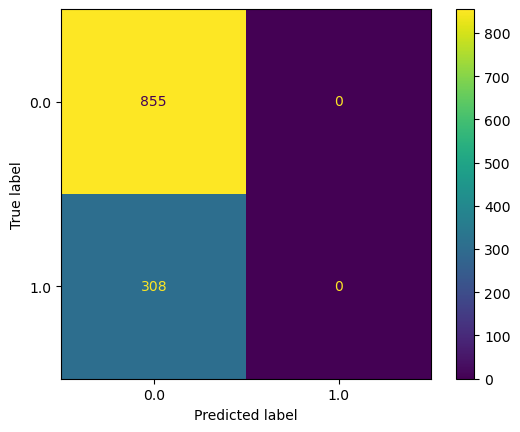

accuracy: 0.7351676698194325
precision: Nan
recall: 0.0
specificity: 1.0


In [1735]:
plotConfusionMatrix(cm, dummy_clf)

We see the dummy baseline model classify all samples as failures, its accuracy is the same as the the ratio of failue in the test data

## Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [1741]:
start_time = time.time()
lgr1 = LogisticRegression(max_iter=1000).fit(X1_train, y1_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.4f} seconds")

Training time: 0.2366 seconds


In [1743]:
accuracy_score(y1_train, lgr1.predict(X1_train))

0.825164803668673

In [1745]:
accuracy_score(y1_test, lgr1.predict(X1_test))

0.8306104901117799

In [1749]:
lgr1.coef_

array([[ 0.17876255, -0.38698106, -0.46342035, -0.21907029, -0.05034802,
         0.26785505, -0.24435173, -0.18653338,  0.50641496,  0.19551257,
         0.39887847, -0.05950545,  0.03815821,  0.018066  , -0.06196977,
        -0.0285049 , -0.08833048, -0.02894874,  0.        ,  0.10161755,
         0.1028551 , -0.10368775,  0.01415378, -0.07202286, -0.27827587,
        -0.73929244,  0.18575405, -0.20228828,  0.47305868,  0.38180625,
         0.69739195, -0.91207171, -0.72141652,  0.51230677,  0.32147003,
        -0.1323278 , -0.15091839,  0.07710345,  0.06089368,  0.14196782,
         0.88271481,  0.13022914,  1.05744804, -0.30249735, -0.21769253,
         0.06029324]])

In [1751]:
sorted(list(zip(lgr1.coef_[0], X1_test.columns.tolist())), reverse=True)

[(1.0574480378974689, 'duration'),
 (0.882714806798787, 'poutcome_success'),
 (0.6973919494750519, 'month_mar'),
 (0.5123067746897617, 'month_oct'),
 (0.5064149617452057, 'job_student'),
 (0.4730586771274644, 'month_jul'),
 (0.3988784687299772, 'job_unemployed'),
 (0.38180624549168046, 'month_jun'),
 (0.3214700274798208, 'month_sep'),
 (0.26785505485167665, 'job_retired'),
 (0.1955125745571387, 'job_technician'),
 (0.18575405091366523, 'month_aug'),
 (0.17876254829996552, 'job_admin.'),
 (0.14196782054843177, 'day_of_week_wed'),
 (0.1302291419285368, 'age'),
 (0.10285510439532165, 'education_university.degree'),
 (0.10161754887137565, 'education_professional.course'),
 (0.07710344970274265, 'day_of_week_thu'),
 (0.06089368310854164, 'day_of_week_tue'),
 (0.06029324141682057, 'previous'),
 (0.038158212700523296, 'marital_married'),
 (0.018066003374921945, 'marital_single'),
 (0.014153778004390997, 'housing_yes'),
 (0.0, 'education_illiterate'),
 (-0.02850489567628453, 'education_basic.6

duration and poutcome_success are most important features in this model, which makes sense

## Problem 9: Score the Model

What is the accuracy of your model?

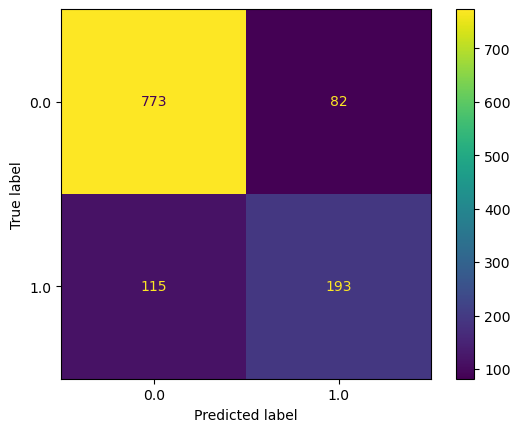

accuracy: 0.8306104901117799
precision: 0.7018181818181818
recall: 0.6266233766233766
specificity: 0.904093567251462


In [1756]:
cm = confusion_matrix(y1_test, lgr1.predict(X1_test))
plotConfusionMatrix(cm, lgr1)

The accuracy is 0.8306

## Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [1761]:
data = {
    'Model':['LogisticRegression', 'SVM', 'DecisionTree', 'KNN'],
    'Train Time	': [0.0782, 0.1376, 0.0235, 0.0057],
    'Train Accuracy': [0.825164803668673, 0.8503869303525365, 1.0, 0.8589853826311264],
    'Test Accuracy': [0.8306104901117799, 0.8452278589853827, 0.7773000859845228, 0.823731728288908]
}
# index_labels = ['LogisticRegression', 'SVM', 'DecisionTree-6', 'KNN-7']
pd.DataFrame(data)

,Model,Train Time\t,Train Accuracy,Test Accuracy
0,LogisticRegression,0.0782,0.825165,0.830610
1,SVM,0.1376,0.850387,0.845228
2,DecisionTree,0.0235,1.000000,0.777300
3,KNN,0.0057,0.858985,0.823732


### SVM

In [1765]:
start_time = time.time()
svc1 = SVC().fit(X1_train, y1_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.4f} seconds")
print(svc1.score(X1_test, y1_test))

Training time: 0.1432 seconds
0.8452278589853827


In [1767]:
accuracy_score(y1_train, svc1.predict(X1_train))

0.8503869303525365

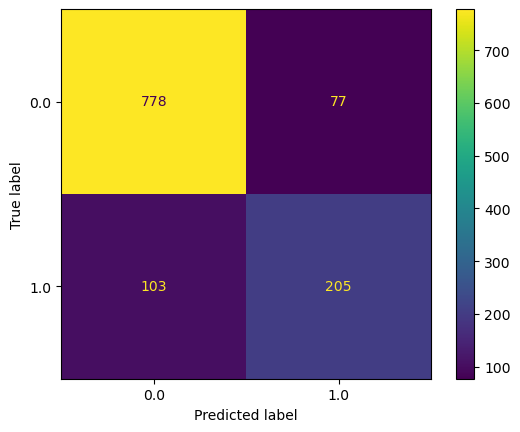

accuracy: 0.8452278589853827
precision: 0.7269503546099291
recall: 0.6655844155844156
specificity: 0.9099415204678363


In [1769]:
cm = confusion_matrix(y1_test, svc1.predict(X1_test))
plotConfusionMatrix(cm, svc1)

### DecisionTree

In [1773]:
start_time = time.time()
dtc1 = DecisionTreeClassifier().fit(X1_train, y1_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.4f} seconds")

Training time: 0.0127 seconds


In [1775]:
accuracy_score(y1_train, dtc1.predict(X1_train))

1.0

In [1777]:
accuracy_score(y1_test, dtc1.predict(X1_test))

0.7858985382631126

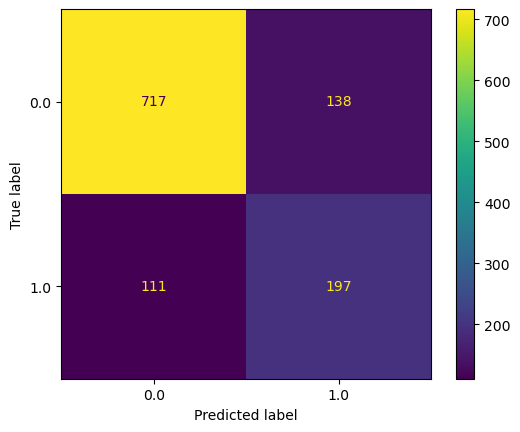

accuracy: 0.7858985382631126
precision: 0.5880597014925373
recall: 0.6396103896103896
specificity: 0.8385964912280702


In [1779]:
cm = confusion_matrix(y1_test, dtc1.predict(X1_test))
plotConfusionMatrix(cm, dtc1)

#### check tree depth

In [1783]:
dtc1.tree_.max_depth

24

#### check feature importantance

In [1786]:
sorted(zip(dtc1.feature_importances_, X1_test.columns.tolist()), reverse=True)

[(0.27742151416301, 'pdays'),
 (0.26059064564116224, 'duration'),
 (0.07681872543337902, 'age'),
 (0.030923352569738678, 'campaign'),
 (0.022105038522067043, 'housing_yes'),
 (0.020456080274740614, 'day_of_week_tue'),
 (0.019454112739984753, 'month_may'),
 (0.018902125213188486, 'month_apr'),
 (0.018046446051447743, 'day_of_week_wed'),
 (0.016175224776289573, 'previous'),
 (0.015080638395979453, 'job_admin.'),
 (0.01466918865094525, 'day_of_week_thu'),
 (0.012607914565690737, 'marital_single'),
 (0.012504150422362251, 'month_nov'),
 (0.01231662685463943, 'marital_married'),
 (0.011707762429261906, 'job_technician'),
 (0.011593875775758381, 'day_of_week_fri'),
 (0.010905026424745026, 'education_university.degree'),
 (0.010618932965858955, 'day_of_week_mon'),
 (0.009242012665474173, 'month_jun'),
 (0.009011743405454159, 'month_oct'),
 (0.008682114388175803, 'education_professional.course'),
 (0.007978893972058273, 'loan_yes'),
 (0.007891200382833535, 'marital_divorced'),
 (0.007613957815

### KNN

In [1791]:
knn1 = KNeighborsClassifier()
start_time = time.time()
knn1.fit(X1_train, y1_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.4f} seconds")
knn1_acc = knn1.score(X1_test, y1_test)
knn1_acc

Training time: 0.0028 seconds


0.823731728288908

In [1793]:
knn1.score(X1_train, y1_train)

0.8589853826311264

## Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### Note!!! There is no gender feature in the dataset

#### Use PolynomialFeatures with degree=2 to transform numerical features

#### Then try tuning the hyperparameters and grid search

I think we should use a different performance metric which focus more on recall and specificity, also with recall being given higher weigh than specificity. Each FalseNegative sample means we lose the opportunity to contact and convince the customer to participate in the campaign. Slightly lower specificity is okay as long as the resource put in to contact each False Positive customer isn't very high.

LogisticRegression is tuned by grid searching on parameter C/regularization, SVM is tuned by grid searching on gama, DecisionTree is tuned by grid searching on max-depth, KNN is tuned by grid searching on n_neighbors.

The following is the table of test result. They are all quite close, DecisionTree(max_depth == 4) has the best recall.

In [1805]:
data = {
    'accuracy':[0.8366294067067928, 0.8409286328460877, 0.8495270851246776, 0.8374892519346517],
    'precision': [0.702054794520548, 0.7220216606498195, 0.7194719471947195, 0.7003367003367004],
    'recall': [0.6655844155844156, 0.6493506493506493, 0.7077922077922078, 0.6753246753246753],
    'specificity': [0.8982456140350877, 0.9099415204678363, 0.9005847953216374, 0.895906432748538]
}
index_labels = ['LogisticRegression', 'SVM', 'DecisionTree-4', 'KNN-21']
pd.DataFrame(data, index = index_labels)

,accuracy,precision,recall,specificity
LogisticRegression,0.836629,0.702055,0.665584,0.898246
SVM,0.840929,0.722022,0.649351,0.909942
DecisionTree-4,0.849527,0.719472,0.707792,0.900585
KNN-21,0.837489,0.700337,0.675325,0.895906


In [1808]:
df0 = df.copy()
df0 = df0.drop(columns = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx',	'euribor3m', 'nr.employed'])

In [1810]:
# df9[clms] = StandardScaler().fit_transform(df9[clms])
poly_transform = PolynomialFeatures(degree=2, include_bias=False)
# pd.DataFrame(poly_transform.fit_transform(df7[['cylinders', 'odometer', 'age']]), columns=poly_transform.get_feature_names_out())

In [1812]:
df2 = removeUnknown(df0)
df21 = df2.drop(columns=['age', 'duration', 'campaign', 'pdays', 'previous']).reset_index(drop=True)
df2 = pd.concat([df21, pd.DataFrame(poly_transform.fit_transform(df2[['age', 'duration', 'campaign', 'pdays', 'previous']]), columns=poly_transform.get_feature_names_out())], axis=1)
clms = poly_transform.get_feature_names_out()
df2[clms] = StandardScaler().fit_transform(df2[clms])

In [1814]:
df2 = featureEncoding(df2)
y2 = df2['y_yes']
df2 = df2.drop(columns =['y_yes'])
df2

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_yes,housing_yes,loan_yes,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_success,age,duration,campaign,pdays,previous,age^2,age duration,age campaign,age pdays,age previous,duration^2,duration campaign,duration pdays,duration previous,campaign^2,campaign pdays,campaign previous,pdays^2,pdays previous,previous^2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.005947,-0.510479,-0.669631,0.626077,-0.422892,-0.135593,-0.465690,-0.588856,0.573676,-0.337439,-0.314036,-0.538868,-0.147681,-0.526030,-0.423280,-0.282957,-0.656146,0.626084,0.309599,-0.346192
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.328580,0.764835,-0.669631,0.626077,-0.422892,-0.393841,0.500219,-0.650912,0.374931,-0.455460,0.215496,-0.091389,1.198274,0.263487,-0.423280,-0.282957,-0.656146,0.626084,0.309599,-0.346192
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.328580,-0.635920,-0.669631,0.626077,-0.422892,-0.393841,-0.619433,-0.650912,0.374931,-0.455460,-0.336697,-0.582882,-0.280070,-0.603688,-0.423280,-0.282957,-0.656146,0.626084,0.309599,-0.346192
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.247921,-0.615013,-0.669631,-1.597175,-0.422892,-0.331827,-0.591674,-0.635398,-1.402730,-0.425954,-0.333286,-0.575547,-0.779994,-0.590745,-0.423280,-0.923213,-0.656146,-1.597262,-1.320385,-0.346192
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.893186,-0.752998,-0.669631,0.626077,-0.422892,-0.780364,-0.768906,-0.759508,0.027128,-0.661996,-0.353092,-0.623962,-0.403633,-0.676168,-0.423280,-0.282957,-0.656146,0.626084,0.309599,-0.346192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4647,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.768532,0.263072,-0.669631,0.626077,1.124940,1.770687,0.893304,-0.247553,1.666772,2.140998,-0.057841,-0.267446,0.668718,0.804501,-0.423280,-0.282957,-0.206007,0.626084,1.949431,0.653902
4648,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.768532,-0.242872,-0.669631,-1.608369,7.316271,1.770687,0.196818,-0.247553,-1.410687,9.458288,-0.248079,-0.444971,-0.782229,2.331764,-0.423280,-0.926437,1.594549,-1.597340,-1.320385,11.321574
4649,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.768532,0.907002,0.035308,-1.597175,2.672773,1.770687,1.779742,0.714301,-1.395269,3.970320,0.308271,0.667124,-0.770346,2.852069,-0.159526,-0.919344,1.594549,-1.597262,-1.300688,2.320726
4650,0.0,0.0,0.0,0.0,0.0

In [1816]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df2, y2, random_state=42)

### LogisticRegression

In [1820]:
param_grid = {
    'C': np.logspace(-4, 0, 50),
    'solver': ['liblinear', 'lbfgs']
}


In [1822]:
grid_lgr2 = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=param_grid
)
grid_lgr2.fit(X2_train, y2_train)
print(grid_lgr2.score(X2_test, y2_test))
print(grid_lgr2.best_estimator_)
print(grid_lgr2.best_params_['solver'])

0.8366294067067928
LogisticRegression(C=0.04941713361323833, max_iter=1000)
lbfgs


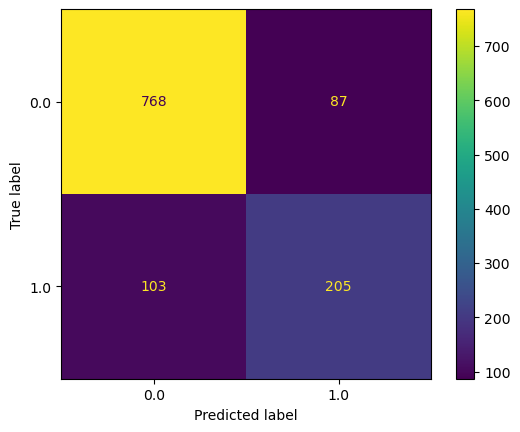

accuracy: 0.8366294067067928
precision: 0.702054794520548
recall: 0.6655844155844156
specificity: 0.8982456140350877


In [1824]:
cm = confusion_matrix(y2_test, grid_lgr2.predict(X2_test))
plotConfusionMatrix(cm, grid_lgr2)

### SVM

In [1829]:
params = {'kernel': ['rbf'],
         'gamma': np.logspace(-4, 1, 100),}
grid_svc2 = GridSearchCV(SVC(), params).fit(X2_train, y2_train)
print(grid_svc2.score(X2_test, y2_test))
print(grid_svc2.best_estimator_)
print(grid_svc2.best_params_['kernel'])

0.8409286328460877
SVC(gamma=0.01484968262254465)
rbf


In [1831]:
svc2 = SVC(kernel='rbf', gamma=0.01484968262254465).fit(X2_train, y2_train)
svc2.score(X2_test, y2_test)

0.8409286328460877

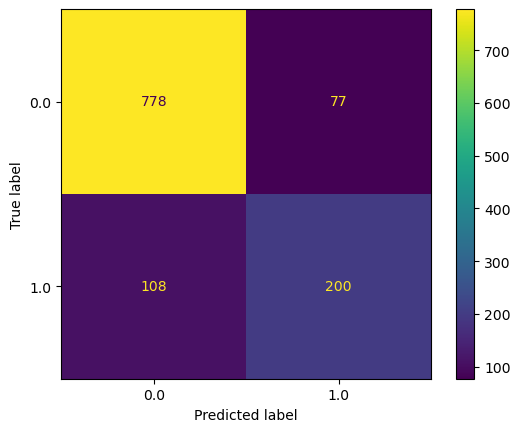

accuracy: 0.8409286328460877
precision: 0.7220216606498195
recall: 0.6493506493506493
specificity: 0.9099415204678363


In [1833]:
cm = confusion_matrix(y2_test, svc2.predict(X2_test))
plotConfusionMatrix(cm, svc2)

### DecisioinTree

In [1838]:
accu = []
for i in range(2, 21):
    dtci = DecisionTreeClassifier(max_depth = i).fit(X2_train, y2_train)
    dtci_preds = dtci.predict(X2_test)
    accu.append(("maxDepth:", i, "accuracy:", accuracy_score(y2_test, dtci_preds)))

accu

[('maxDepth:', 2, 'accuracy:', 0.8443680137575237),
 ('maxDepth:', 3, 'accuracy:', 0.8460877042132416),
 ('maxDepth:', 4, 'accuracy:', 0.8495270851246776),
 ('maxDepth:', 5, 'accuracy:', 0.8460877042132416),
 ('maxDepth:', 6, 'accuracy:', 0.8417884780739467),
 ('maxDepth:', 7, 'accuracy:', 0.8314703353396389),
 ('maxDepth:', 8, 'accuracy:', 0.8134135855546002),
 ('maxDepth:', 9, 'accuracy:', 0.8013757523645744),
 ('maxDepth:', 10, 'accuracy:', 0.7979363714531384),
 ('maxDepth:', 11, 'accuracy:', 0.7936371453138436),
 ('maxDepth:', 12, 'accuracy:', 0.7867583834909716),
 ('maxDepth:', 13, 'accuracy:', 0.7738607050730868),
 ('maxDepth:', 14, 'accuracy:', 0.7755803955288049),
 ('maxDepth:', 15, 'accuracy:', 0.7876182287188306),
 ('maxDepth:', 16, 'accuracy:', 0.7841788478073947),
 ('maxDepth:', 17, 'accuracy:', 0.7833190025795357),
 ('maxDepth:', 18, 'accuracy:', 0.7807394668959587),
 ('maxDepth:', 19, 'accuracy:', 0.7893379191745485),
 ('maxDepth:', 20, 'accuracy:', 0.7790197764402408)]

In [1841]:
dtc4 = DecisionTreeClassifier(max_depth = 4).fit(X2_train, y2_train)
dtc4.score(X2_test, y2_test)

0.8495270851246776

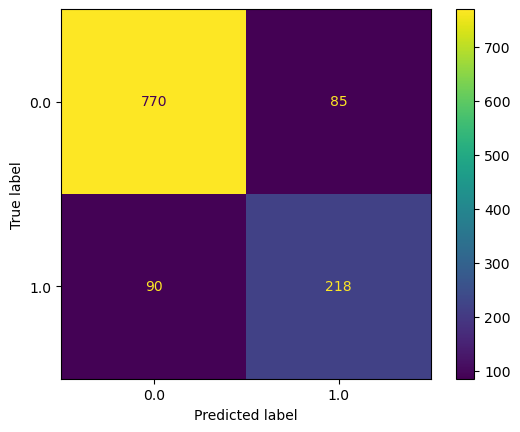

accuracy: 0.8495270851246776
precision: 0.7194719471947195
recall: 0.7077922077922078
specificity: 0.9005847953216374


In [1843]:
cm = confusion_matrix(y2_test, dtc4.predict(X2_test))
plotConfusionMatrix(cm, dtc4)

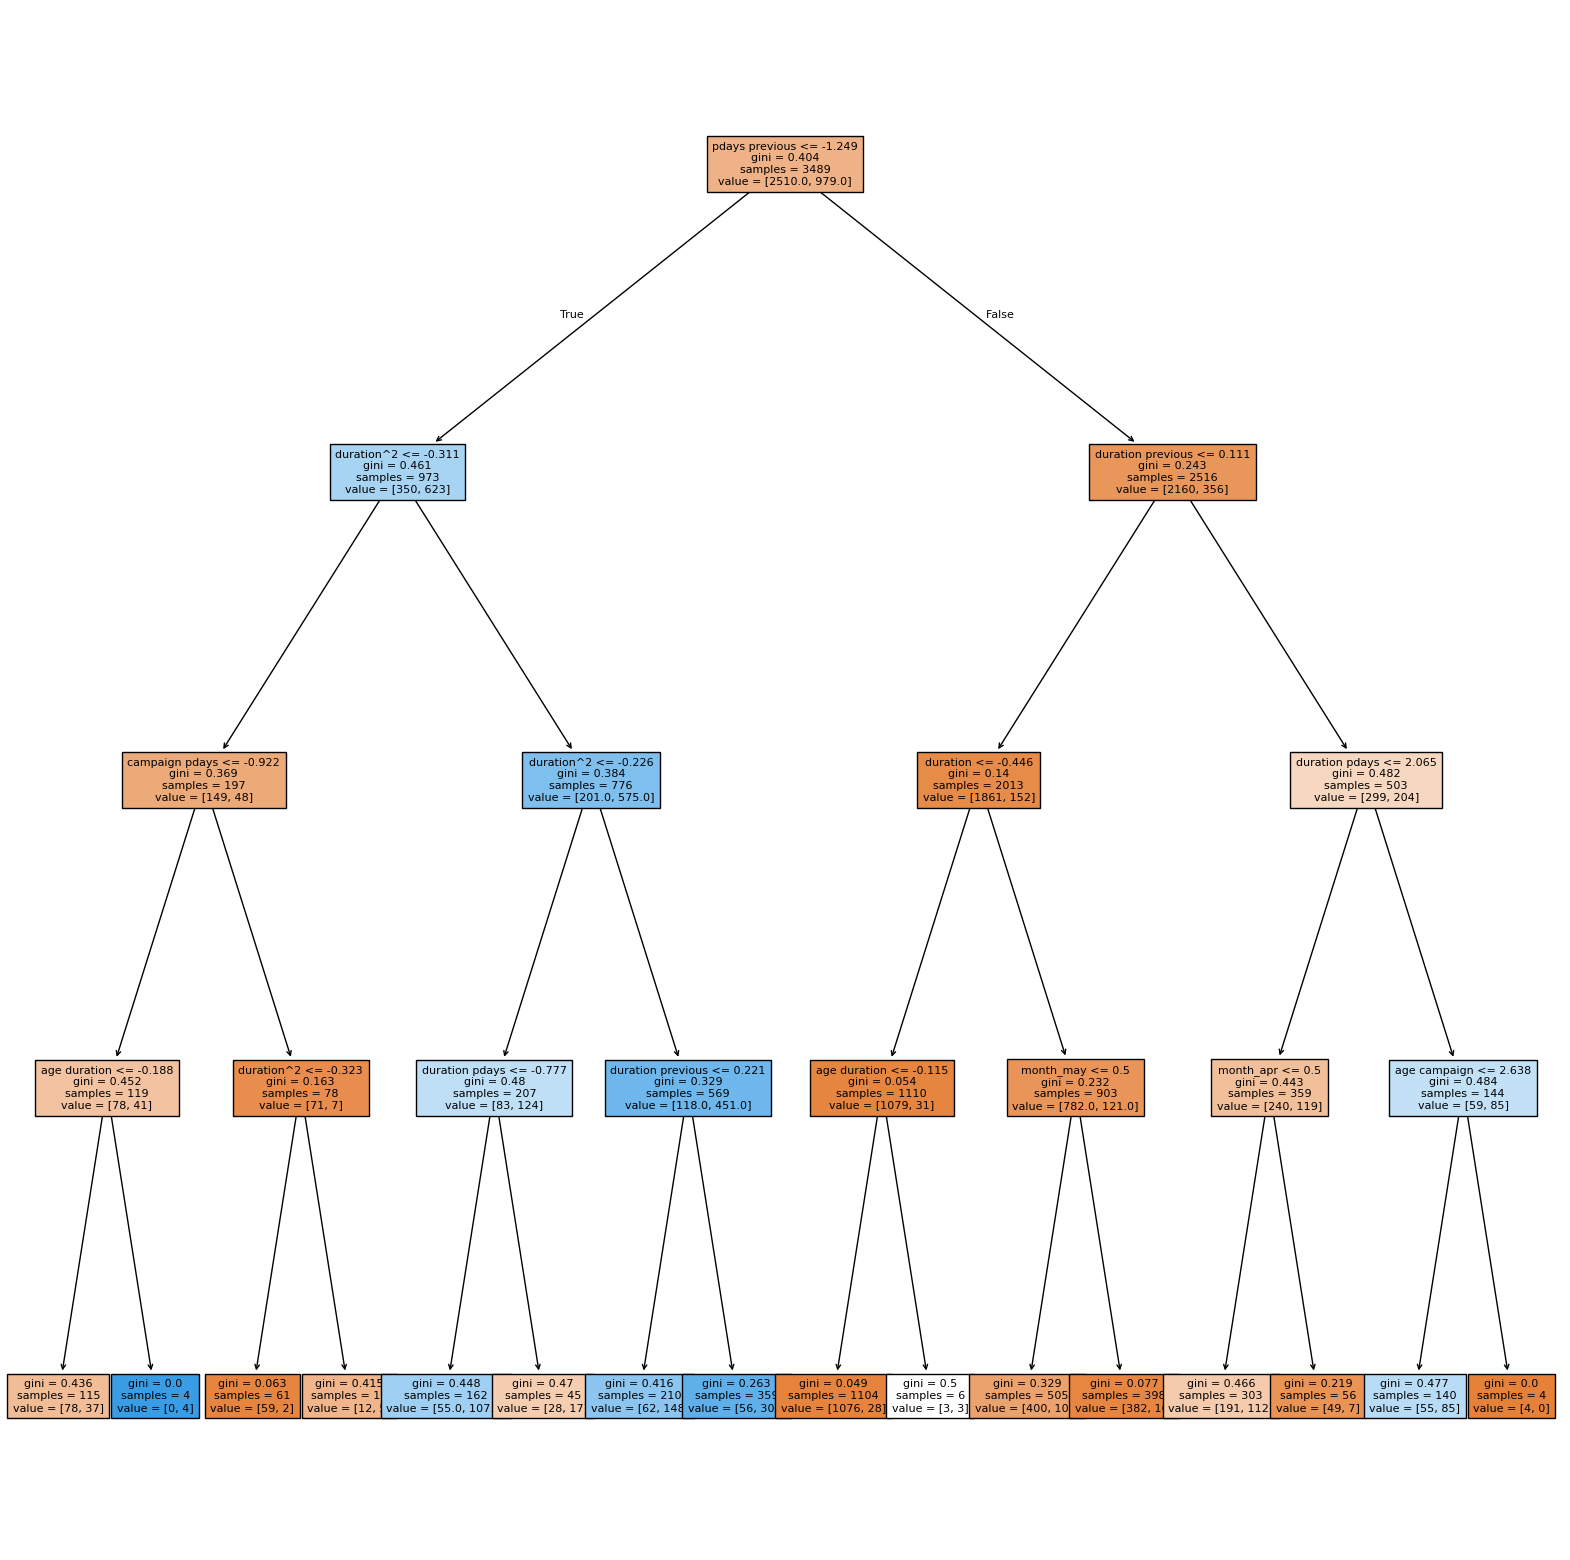

In [1846]:
fig, ax = plt.subplots(figsize = (20, 20))
plot_tree(dtc4, feature_names=list(X2_train.columns), filled=True, ax = ax, fontsize=8);

In [1849]:
dtc6 = DecisionTreeClassifier(max_depth = 6).fit(X2_train, y2_train)
dtc6.score(X2_test, y2_test)

0.8426483233018057

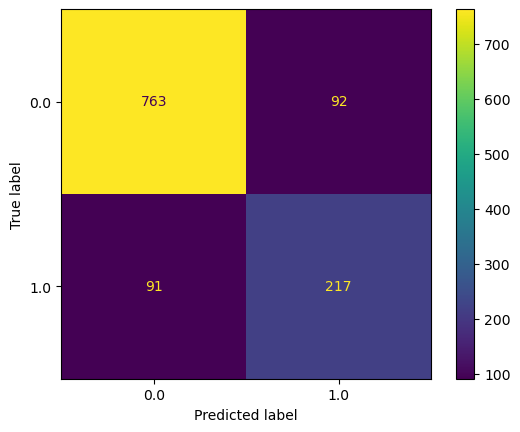

accuracy: 0.8426483233018057
precision: 0.7022653721682848
recall: 0.7045454545454546
specificity: 0.8923976608187134


In [1851]:
cm = confusion_matrix(y2_test, dtc6.predict(X2_test))
plotConfusionMatrix(cm, dtc6)

In [1854]:
dtc3 = DecisionTreeClassifier(max_depth = 3).fit(X2_train, y2_train)
dtc3.score(X2_test, y2_test)

0.8460877042132416

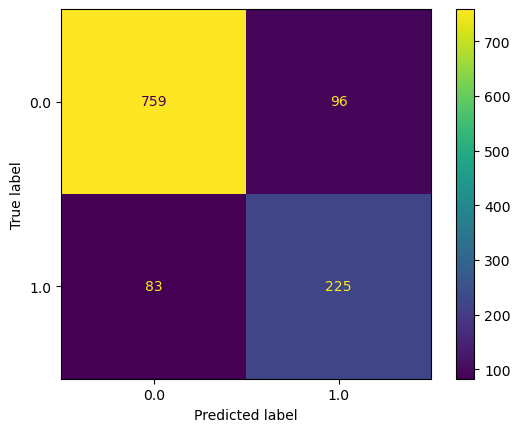

accuracy: 0.8460877042132416
precision: 0.7009345794392523
recall: 0.7305194805194806
specificity: 0.887719298245614


In [1856]:
cm = confusion_matrix(y2_test, dtc3.predict(X2_test))
plotConfusionMatrix(cm, dtc3)

### KNN

In [1861]:
accu = []
for i in range(3, 30):
    # pipe_i = Pipeline([('transform', StandardScaler()), ('knn', KNeighborsClassifier(i))])
    knni = KNeighborsClassifier(i).fit(X2_train, y2_train)
    # pipe_i.fit(X2_train, y2_train)
    accu.append(("n_neighbors:", i, "accuracy:", knni.score(X2_test, y2_test)))
accu

[('n_neighbors:', 3, 'accuracy:', 0.8030954428202923),
 ('n_neighbors:', 4, 'accuracy:', 0.8091143594153053),
 ('n_neighbors:', 5, 'accuracy:', 0.8091143594153053),
 ('n_neighbors:', 6, 'accuracy:', 0.8116938950988822),
 ('n_neighbors:', 7, 'accuracy:', 0.8159931212381771),
 ('n_neighbors:', 8, 'accuracy:', 0.8116938950988822),
 ('n_neighbors:', 9, 'accuracy:', 0.822871883061049),
 ('n_neighbors:', 10, 'accuracy:', 0.821152192605331),
 ('n_neighbors:', 11, 'accuracy:', 0.820292347377472),
 ('n_neighbors:', 12, 'accuracy:', 0.82201203783319),
 ('n_neighbors:', 13, 'accuracy:', 0.823731728288908),
 ('n_neighbors:', 14, 'accuracy:', 0.821152192605331),
 ('n_neighbors:', 15, 'accuracy:', 0.825451418744626),
 ('n_neighbors:', 16, 'accuracy:', 0.8245915735167669),
 ('n_neighbors:', 17, 'accuracy:', 0.828030954428203),
 ('n_neighbors:', 18, 'accuracy:', 0.827171109200344),
 ('n_neighbors:', 19, 'accuracy:', 0.8288907996560619),
 ('n_neighbors:', 20, 'accuracy:', 0.8288907996560619),
 ('n_neig

In [1864]:
knn2 = KNeighborsClassifier(5).fit(X2_train, y2_train)
# Knn2.fit(X2_train, y2_train)
knn2.score(X2_test, y2_test)

0.8091143594153053

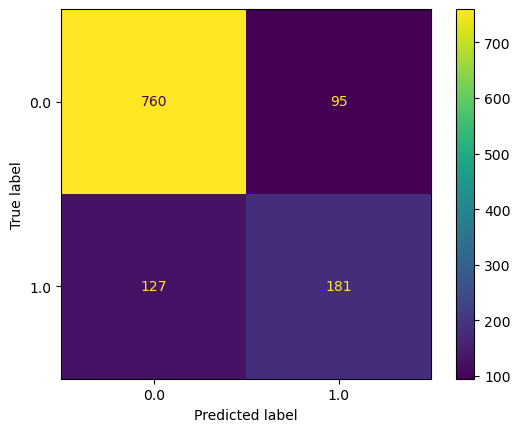

accuracy: 0.8091143594153053
precision: 0.6557971014492754
recall: 0.5876623376623377
specificity: 0.8888888888888888


In [1866]:
cm = confusion_matrix(y2_test, knn2.predict(X2_test))
plotConfusionMatrix(cm, knn2)

In [1869]:
knn2 = KNeighborsClassifier(21).fit(X2_train, y2_train)
# Knn2.fit(X2_train, y2_train)
knn2.score(X2_test, y2_test)

0.8374892519346517

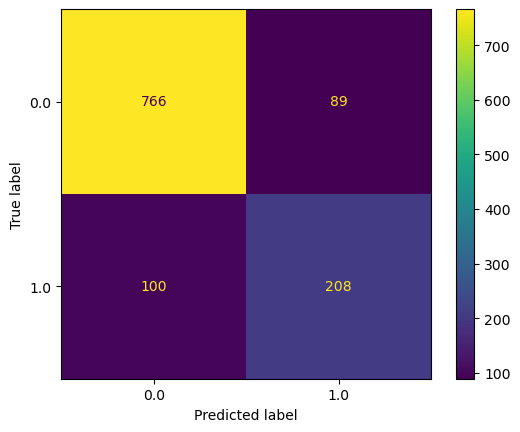

accuracy: 0.8374892519346517
precision: 0.7003367003367004
recall: 0.6753246753246753
specificity: 0.895906432748538


In [1871]:
cm = confusion_matrix(y2_test, knn2.predict(X2_test))
plotConfusionMatrix(cm, knn2)

## 12: Further Improvement
### Use predict_proba of the classifier and custom threshold to tune the confusion matrix

#### I would use a custom threshold of 0.3 to improve recall because each False Negative would likely cost us a campaign success

 LogisticRegresion is quite good for recall and specificity

In [1879]:
data = {
    'accuracy':[0.819432502149613, 0.8435081685296647, 0.7858985382631126, 0.8056749785038693],
    'precision': [0.6189320388349514, 0.6863905325443787, 0.565410199556541, 0.5990338164251208],
    'recall': [0.827922077922078, 0.7532467532467533, 0.827922077922078, 0.8051948051948052],
    'specificity': [0.816374269005848, 0.8760233918128655, 0.7707602339181286, 0.8058479532163743]
}
index_labels = ['LogisticRegression', 'SVM', 'DecisionTree-4', 'KNN-21']
pd.DataFrame(data, index = index_labels)

,accuracy,precision,recall,specificity
LogisticRegression,0.819433,0.618932,0.827922,0.816374
SVM,0.843508,0.686391,0.753247,0.876023
DecisionTree-4,0.785899,0.565410,0.827922,0.770760
KNN-21,0.805675,0.599034,0.805195,0.805848


#### define a custome threshould predict function

In [1884]:
def custom_predict(model, X, threshold):
    probs = model.predict_proba(X) 
    return (probs[:, 1] > threshold).astype(int)
    

#### LogisticRegression with custom threshold

In [1888]:
lgr2 = LogisticRegression(C=0.04941713361323833, max_iter=1000).fit(X2_train, y2_train)
lgr2_03_preds = custom_predict(lgr2, X2_test, threshold=0.3)

In [1890]:
lgr2_03_preds

array([1, 0, 0, ..., 0, 1, 0])

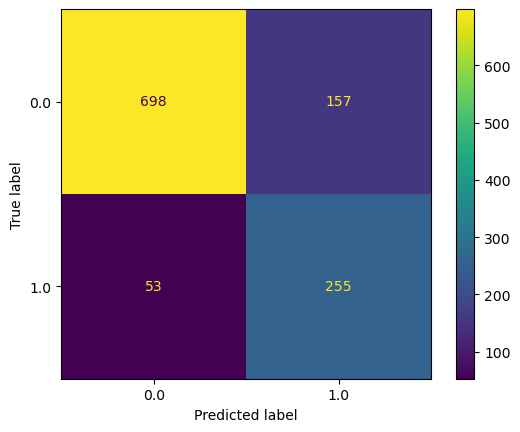

accuracy: 0.819432502149613
precision: 0.6189320388349514
recall: 0.827922077922078
specificity: 0.816374269005848


In [1892]:
cm = confusion_matrix(y2_test, lgr2_03_preds)
plotConfusionMatrix(cm, lgr2)

In [1894]:
cm

array([[698, 157],
       [ 53, 255]])

#### SVM with custom threshold

In [1899]:
svc2 = SVC(kernel='rbf', probability=True, gamma=0.01484968262254465).fit(X2_train, y2_train)

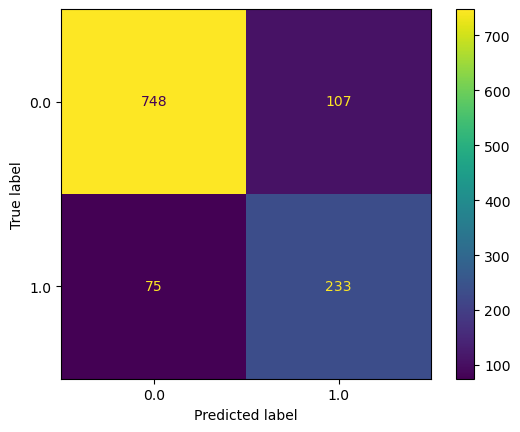

accuracy: 0.8435081685296647
precision: 0.6852941176470588
recall: 0.7564935064935064
specificity: 0.8748538011695907


In [1900]:
svc2_03_preds = custom_predict(svc2, X2_test, threshold=0.3)
cm = confusion_matrix(y2_test, svc2_03_preds)
plotConfusionMatrix(cm, svc2)

#### DecisionTree with custom threshold

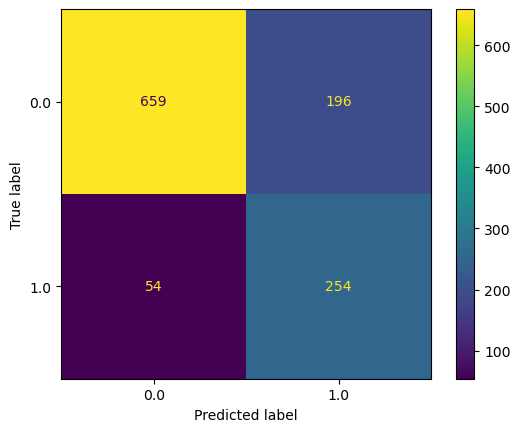

accuracy: 0.7850386930352536
precision: 0.5644444444444444
recall: 0.8246753246753247
specificity: 0.7707602339181286


In [1905]:
dtc6 = DecisionTreeClassifier(max_depth = 4).fit(X2_train, y2_train)
dtc6_03_preds = custom_predict(dtc6, X2_test, threshold=0.3)
cm = confusion_matrix(y2_test, dtc6_03_preds)
plotConfusionMatrix(cm, dtc6)

#### KNN with custom threshold

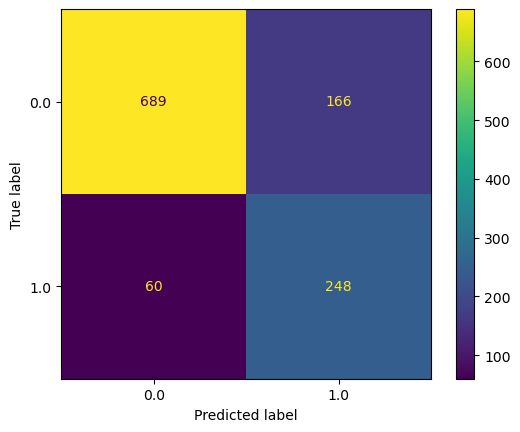

accuracy: 0.8056749785038693
precision: 0.5990338164251208
recall: 0.8051948051948052
specificity: 0.8058479532163743


In [1909]:
knn2 = KNeighborsClassifier(21).fit(X2_train, y2_train)
knn2.score(X2_test, y2_test)
knn2_03_preds = custom_predict(knn2, X2_test, threshold=0.3)
cm = confusion_matrix(y2_test, knn2_03_preds)
plotConfusionMatrix(cm, knn2)

## 13: Another thought, simply the model by removing some features
#### Try removing features month, day_of_week, job, education and martial

These categorical features end up with more than 30 features after OneHot encoding, removing them leave us with a much smaller table, here I also use a custom threshold of 0.3 to improve recall.

DecisionTree stands out in recall, LogisticRegression and KNN have good balance between recall and specificity

In [1916]:
data = {
    'accuracy':[0.7953568357695615, 0.8417884780739467, 0.7678417884780739, 0.7944969905417025],
    'precision': [0.5813953488372093, 0.6949685534591195, 0.5390946502057613, 0.5793103448275863],
    'recall': [0.8116883116883117, 0.7175324675324676, 0.8506493506493507, 0.8181818181818182],
    'specificity': [0.7894736842105263, 0.8865497076023392, 0.7380116959064328, 0.7859649122807018]
}
index_labels = ['LogisticRegression', 'SVM', 'DecisionTree-4', 'KNN-46']
pd.DataFrame(data, index = index_labels)

,accuracy,precision,recall,specificity
LogisticRegression,0.795357,0.581395,0.811688,0.789474
SVM,0.841788,0.694969,0.717532,0.886550
DecisionTree-4,0.767842,0.539095,0.850649,0.738012
KNN-46,0.794497,0.579310,0.818182,0.785965


The purpose of removing these categorial features is to create a simpler model and possibility reduce overfitting.

In [1920]:
df0 = df.copy()
df0 = df0.drop(columns = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx',	'euribor3m', 'nr.employed'])

In [1922]:
df3 = removeUnknown(df0)
df3 = df3.drop(columns = ['month', 'day_of_week', 'job', 'marital', 'education'])
df31 = df3.drop(columns=['age', 'duration', 'campaign', 'pdays', 'previous']).reset_index(drop=True)
df3 = pd.concat([df31, pd.DataFrame(poly_transform.fit_transform(df3[['age', 'duration', 'campaign', 'pdays', 'previous']]), columns=poly_transform.get_feature_names_out())], axis=1)
clms = poly_transform.get_feature_names_out()
df3[clms] = StandardScaler().fit_transform(df3[clms])

In [1924]:
df3 = featureEncoding(df3)

In [1926]:
y3 = df3['y_yes']
df3 = df3.drop(columns =['y_yes'])
df3

,default_yes,housing_yes,loan_yes,contact_telephone,poutcome_success,age,duration,campaign,pdays,previous,age^2,age duration,age campaign,age pdays,age previous,duration^2,duration campaign,duration pdays,duration previous,campaign^2,campaign pdays,campaign previous,pdays^2,pdays previous,previous^2
0,0.0,1.0,0.0,1.0,0.0,-0.005947,-0.510479,-0.669631,0.626077,-0.422892,-0.135593,-0.465690,-0.588856,0.573676,-0.337439,-0.314036,-0.538868,-0.147681,-0.526030,-0.423280,-0.282957,-0.656146,0.626084,0.309599,-0.346192
1,0.0,1.0,0.0,1.0,0.0,-0.328580,0.764835,-0.669631,0.626077,-0.422892,-0.393841,0.500219,-0.650912,0.374931,-0.455460,0.215496,-0.091389,1.198274,0.263487,-0.423280,-0.282957,-0.656146,0.626084,0.309599,-0.346192
2,0.0,1.0,0.0,1.0,0.0,-0.328580,-0.635920,-0.669631,0.626077,-0.422892,-0.393841,-0.619433,-0.650912,0.374931,-0.455460,-0.336697,-0.582882,-0.280070,-0.603688,-0.423280,-0.282957,-0.656146,0.626084,0.309599,-0.346192
3,0.0,1.0,0.0,1.0,1.0,-0.247921,-0.615013,-0.669631,-1.597175,-0.422892,-0.331827,-0.591674,-0.635398,-1.402730,-0.425954,-0.333286,-0.575547,-0.779994,-0.590745,-0.423280,-0.923213,-0.656146,-1.597262,-1.320385,-0.346192
4,0.0,1.0,0.0,1.0,0.0,-0.893186,-0.752998,-0.669631,0.626077,-0.422892,-0.780364,-0.768906,-0.759508,0.027128,-0.661996,-0.353092,-0.623962,-0.403633,-0.676168,-0.423280,-0.282957,-0.656146,0.626084,0.309599,-0.346192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4647,0.0,1.0,0.0,0.0,0.0,1.768532,0.263072,-0.669631,0.626077,1.124940,1.770687,0.893304,-0.247553,1.666772,2.140998,-0.057841,-0.267446,0.668718,0.804501,-0.423280,-0.282957,-0.206007,0.626084,1.949431,0.653902
4648,0.0,1.0,0.0,0.0,1.0,1.768532,-0.242872,-0.669631,-1.608369,7.316271,1.770687,0.196818,-0.247553,-1.410687,9.458288,-0.248079,-0.444971,-0.782229,2.331764,-0.423280,-0.926437,1.594549,-1.597340,-1.320385,11.321574
4649,0.0,0.0,0.0,0.0,1.0,1.768532,0.907002,0.035308,-1.597175,2.672773,1.770687,1.779742,0.714301,-1.395269,3.970320,0.308271,0.667124,-0.770346,2.852069,-0.159526,-0.919344,1.594549,-1.597262,-1.300688,2.320726
4650,0.0,1.0,0.0,0.0,1.0,-0.893186,-0.644283,-0.669631,-1.590458,-0.422892,-0.780364,-0.698904,-0.759508,-1.400790,-0.661996,-0.338020,-0.585817,-0.778695,-0.608865,-0.423280,-0.921279,-0.656146,-1.597162,-1.315461,-0.346192


In [1929]:
X3_train, X3_test, y3_train, y3_test = train_test_split(df3, y3, random_state=42)

#### LogisticRegression

In [1933]:
param_grid = {
    'C': np.logspace(-3, 1, 50)
}
grid_lgr3 = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=param_grid
)
grid_lgr3.fit(X3_train, y3_train)
print(grid_lgr3.score(X3_test, y3_test))
print(grid_lgr3.best_estimator_)

0.8374892519346517
LogisticRegression(C=0.09102981779915217, max_iter=1000)


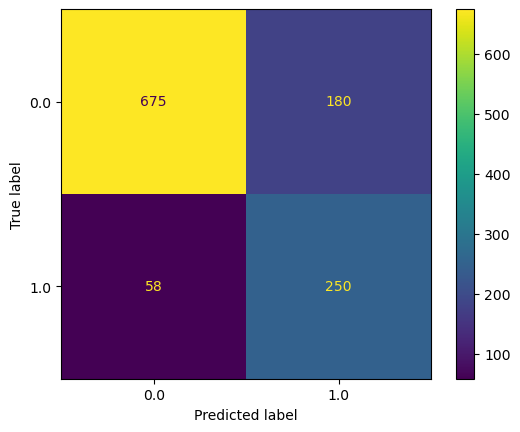

accuracy: 0.7953568357695615
precision: 0.5813953488372093
recall: 0.8116883116883117
specificity: 0.7894736842105263


In [1934]:
lgr3 = LogisticRegression(C=0.09102981779915217, max_iter=1000).fit(X3_train, y3_train)
lgr3_03_preds = custom_predict(lgr3, X3_test, threshold=0.3)
cm = confusion_matrix(y3_test, lgr3_03_preds)
plotConfusionMatrix(cm, lgr3)

#### SVM

In [1939]:
params = {'kernel': ['rbf'],
         'gamma': np.logspace(-4, 1, 100),}
grid_svc3 = GridSearchCV(SVC(), params).fit(X3_train, y3_train)
print(grid_svc3.score(X3_test, y3_test))
print(grid_svc3.best_estimator_)
print(grid_svc3.best_params_['kernel'])

0.8400687876182287
SVC(gamma=0.03351602650938841)
rbf


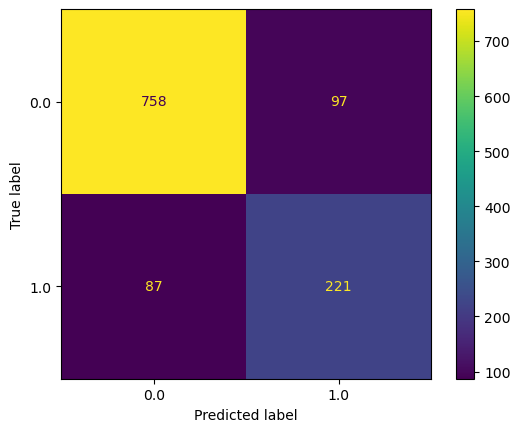

accuracy: 0.8417884780739467
precision: 0.6949685534591195
recall: 0.7175324675324676
specificity: 0.8865497076023392


In [1941]:
svc3 = SVC(kernel='rbf', probability=True, gamma=0.03351602650938841).fit(X3_train, y3_train)
svc3_03_preds = custom_predict(svc3, X3_test, threshold=0.3)
cm = confusion_matrix(y3_test, svc3_03_preds)
plotConfusionMatrix(cm, svc3)

#### DecisionTree

In [1946]:
accu = []
for i in range(2, 31):
    dtci = DecisionTreeClassifier(max_depth = i).fit(X3_train, y3_train)
    dtci_preds = dtci.predict(X3_test)
    accu.append(("maxDepth:", i, "accuracy:", accuracy_score(y3_test, dtci_preds)))

accu

[('maxDepth:', 2, 'accuracy:', 0.8443680137575237),
 ('maxDepth:', 3, 'accuracy:', 0.8460877042132416),
 ('maxDepth:', 4, 'accuracy:', 0.8495270851246776),
 ('maxDepth:', 5, 'accuracy:', 0.8469475494411006),
 ('maxDepth:', 6, 'accuracy:', 0.8417884780739467),
 ('maxDepth:', 7, 'accuracy:', 0.8340498710232158),
 ('maxDepth:', 8, 'accuracy:', 0.8288907996560619),
 ('maxDepth:', 9, 'accuracy:', 0.8082545141874462),
 ('maxDepth:', 10, 'accuracy:', 0.8056749785038693),
 ('maxDepth:', 11, 'accuracy:', 0.8013757523645744),
 ('maxDepth:', 12, 'accuracy:', 0.7979363714531384),
 ('maxDepth:', 13, 'accuracy:', 0.7953568357695615),
 ('maxDepth:', 14, 'accuracy:', 0.7876182287188306),
 ('maxDepth:', 15, 'accuracy:', 0.7841788478073947),
 ('maxDepth:', 16, 'accuracy:', 0.7712811693895099),
 ('maxDepth:', 17, 'accuracy:', 0.7704213241616509),
 ('maxDepth:', 18, 'accuracy:', 0.7790197764402408),
 ('maxDepth:', 19, 'accuracy:', 0.7730008598452278),
 ('maxDepth:', 20, 'accuracy:', 0.7721410146173688),
 

In [1948]:
dtc6 = DecisionTreeClassifier(max_depth = 4).fit(X3_train, y3_train)

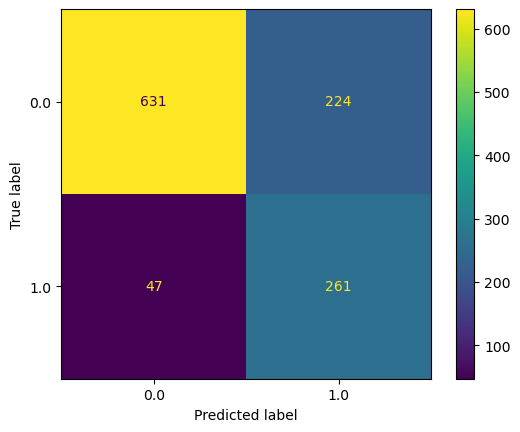

accuracy: 0.766981943250215
precision: 0.5381443298969072
recall: 0.8474025974025974
specificity: 0.7380116959064328


In [1950]:
dtc6_03_preds = custom_predict(dtc6, X3_test, threshold=0.3)
cm = confusion_matrix(y3_test, dtc6_03_preds)
plotConfusionMatrix(cm, dtc6)

#### KNN

In [1955]:
accu = []
for i in range(3, 51):
    # pipe_i = Pipeline([('transform', StandardScaler()), ('knn', KNeighborsClassifier(i))])
    knni = KNeighborsClassifier(i).fit(X3_train, y3_train)
    # pipe_i.fit(X2_train, y2_train)
    accu.append(("n_neighbors:", i, "accuracy:", knni.score(X3_test, y3_test)))
accu

[('n_neighbors:', 3, 'accuracy:', 0.7807394668959587),
 ('n_neighbors:', 4, 'accuracy:', 0.7927773000859846),
 ('n_neighbors:', 5, 'accuracy:', 0.7953568357695615),
 ('n_neighbors:', 6, 'accuracy:', 0.8022355975924333),
 ('n_neighbors:', 7, 'accuracy:', 0.7970765262252795),
 ('n_neighbors:', 8, 'accuracy:', 0.8125537403267412),
 ('n_neighbors:', 9, 'accuracy:', 0.8091143594153053),
 ('n_neighbors:', 10, 'accuracy:', 0.822871883061049),
 ('n_neighbors:', 11, 'accuracy:', 0.8288907996560619),
 ('n_neighbors:', 12, 'accuracy:', 0.822871883061049),
 ('n_neighbors:', 13, 'accuracy:', 0.8306104901117799),
 ('n_neighbors:', 14, 'accuracy:', 0.8340498710232158),
 ('n_neighbors:', 15, 'accuracy:', 0.8340498710232158),
 ('n_neighbors:', 16, 'accuracy:', 0.8357695614789338),
 ('n_neighbors:', 17, 'accuracy:', 0.8331900257953568),
 ('n_neighbors:', 18, 'accuracy:', 0.8306104901117799),
 ('n_neighbors:', 19, 'accuracy:', 0.827171109200344),
 ('n_neighbors:', 20, 'accuracy:', 0.828030954428203),
 ('

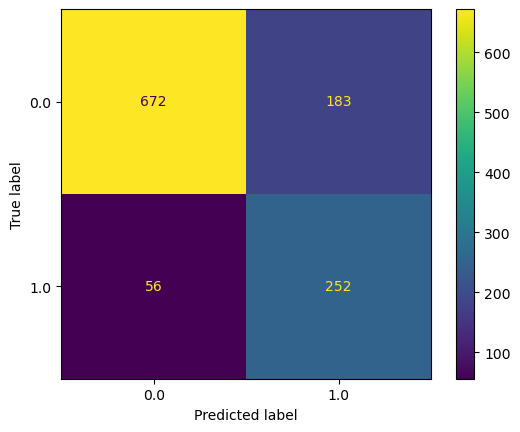

accuracy: 0.7944969905417025
precision: 0.5793103448275863
recall: 0.8181818181818182
specificity: 0.7859649122807018


In [1957]:
knn3 = KNeighborsClassifier(46).fit(X3_train, y3_train)
knn3.score(X3_test, y3_test)
knn3_03_preds = custom_predict(knn3, X3_test, threshold=0.3)
cm = confusion_matrix(y3_test, knn3_03_preds)
plotConfusionMatrix(cm, knn3)

##### Questions